In [19]:
!pip install ultralytics


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [20]:
import os
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

display.clear_output()
!yolo mode = checks

Traceback (most recent call last):
  File "/home/eng_39_0072/Desktop/Gayanga/traffic/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ~~~~~~~~~~^^
  File "/home/eng_39_0072/Desktop/Gayanga/traffic/lib/python3.13/site-packages/ultralytics/cfg/__init__.py", line 922, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/home/eng_39_0072/Desktop/Gayanga/traffic/lib/python3.13/site-packages/ultralytics/utils/checks.py'>'. Valid modes are ['train', 'track', 'export', 'benchmark', 'predict', 'val'].

    Arguments received: ['yolo', 'mode', '=', 'checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['obb', 'classify', 'segment', 'detect', 'pose']
                MODE (required) is one of ['train', 'track', 'export', 'benchmark', 'predict', 'val']
                ARGS 

# **Loading the YOLOv8 Model**

In [21]:
## 2 ways to Load a model
# first one is ---->

model = YOLO("yolov8n.yaml")  # build a new model from YAML
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolov8n.yaml").load("yolov8n.pt")  # build from YAML and transfer weights

# second one is ---->

#!yolo task=detect mode=train model=yolov8m.pt data="/kaggle/input/traffic-detection-project/data.yaml" epochs=5 imgsz=640

Transferred 355/355 items from pretrained weights


# **Getting the Data Paths**

Optional step if you don't have the configuration files (which you should) you can create it (based on your data ofc)

config_yaml = """test : /kaggle/input/traffic-detection-project/test/images
train : /kaggle/input/traffic-detection-project/train/images
val : /kaggle/input/traffic-detection-project/valid/images
    
nc : 5
classes : ["car", "motorbike", "person", "bicycle", "bus"]"""

with open("/kaggle/working/data.yaml", 'w') as file:
    file.write(config_yaml)

#To display the content of the file, you can use the 'cat' command like this:
%cat /kaggle/working/data.yaml

# **Training the Model**

We have to create an account in wandb.ai and use the api provided in the account

In [22]:
# Train the model
results = model.train(data="/home/eng_39_0072/Desktop/Gayanga/Traffic_detection/data.yaml", epochs=3, imgsz = 640)
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics 8.3.199 🚀 Python-3.13.5 torch-2.8.0+cu128 CPU (Intel Xeon Silver 4210 CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/eng_39_0072/Desktop/Gayanga/Traffic_detection/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

KeyboardInterrupt: 

# **Results Visualization**

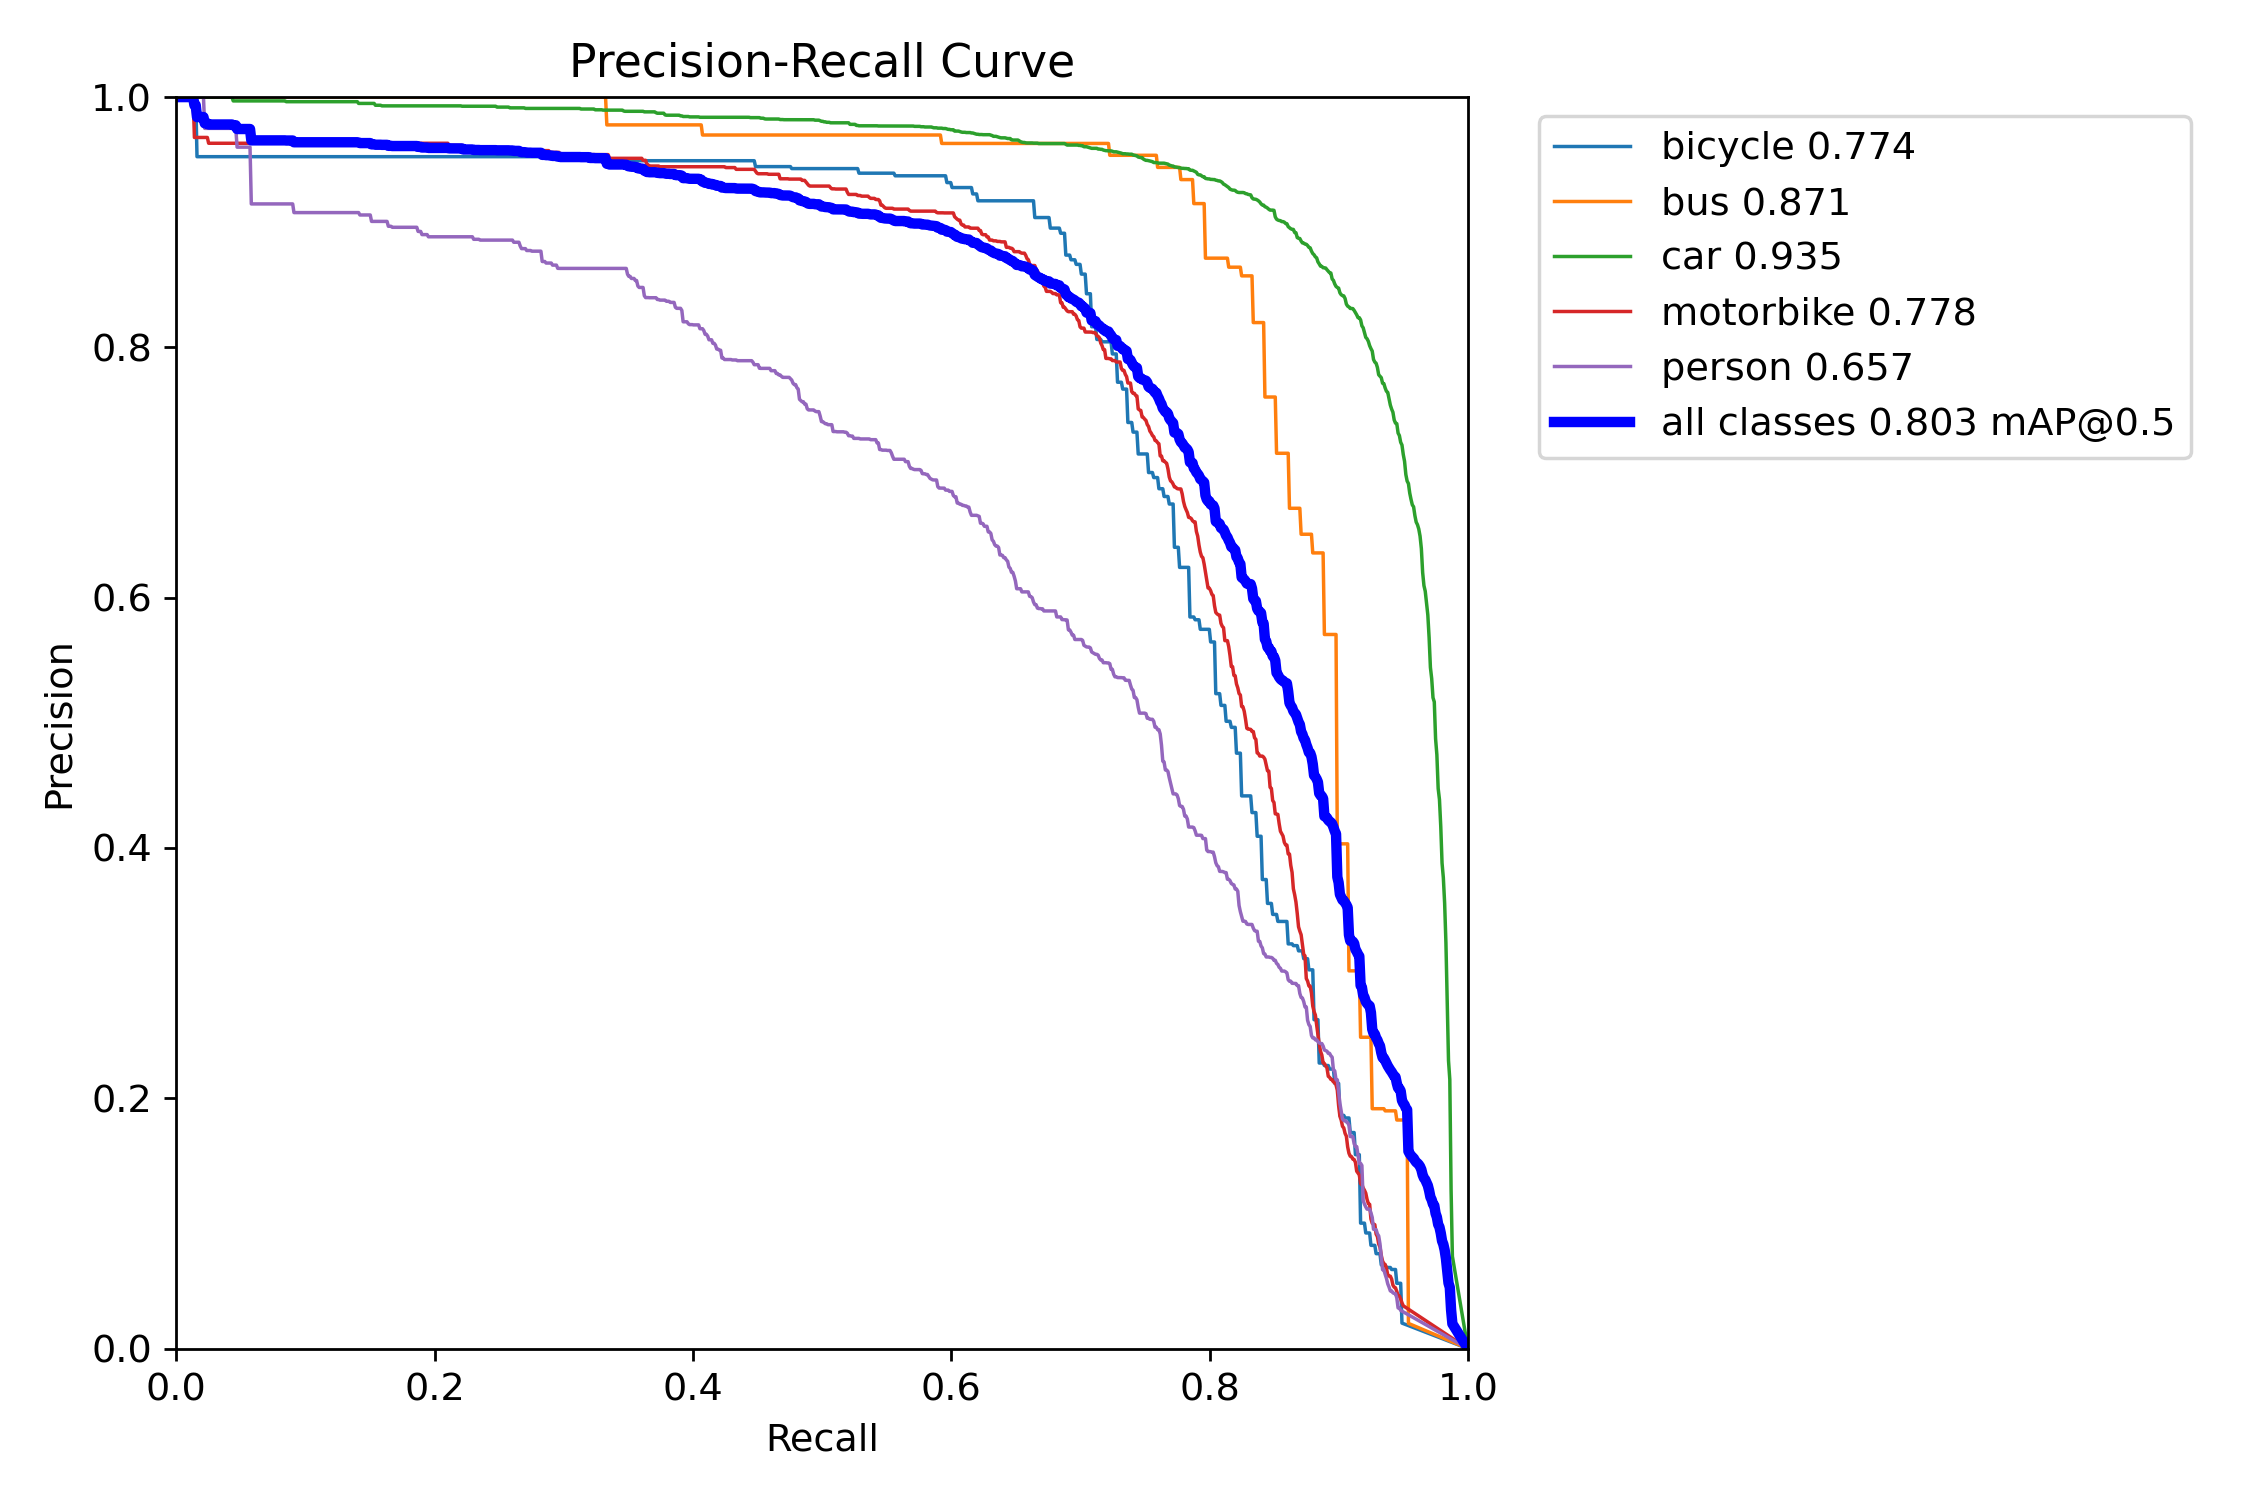

In [ ]:
Image(filename = "/home/eng_39_0072/Desktop/Gayanga/runs/detect/train2/BoxPR_curve.png", width = 600)

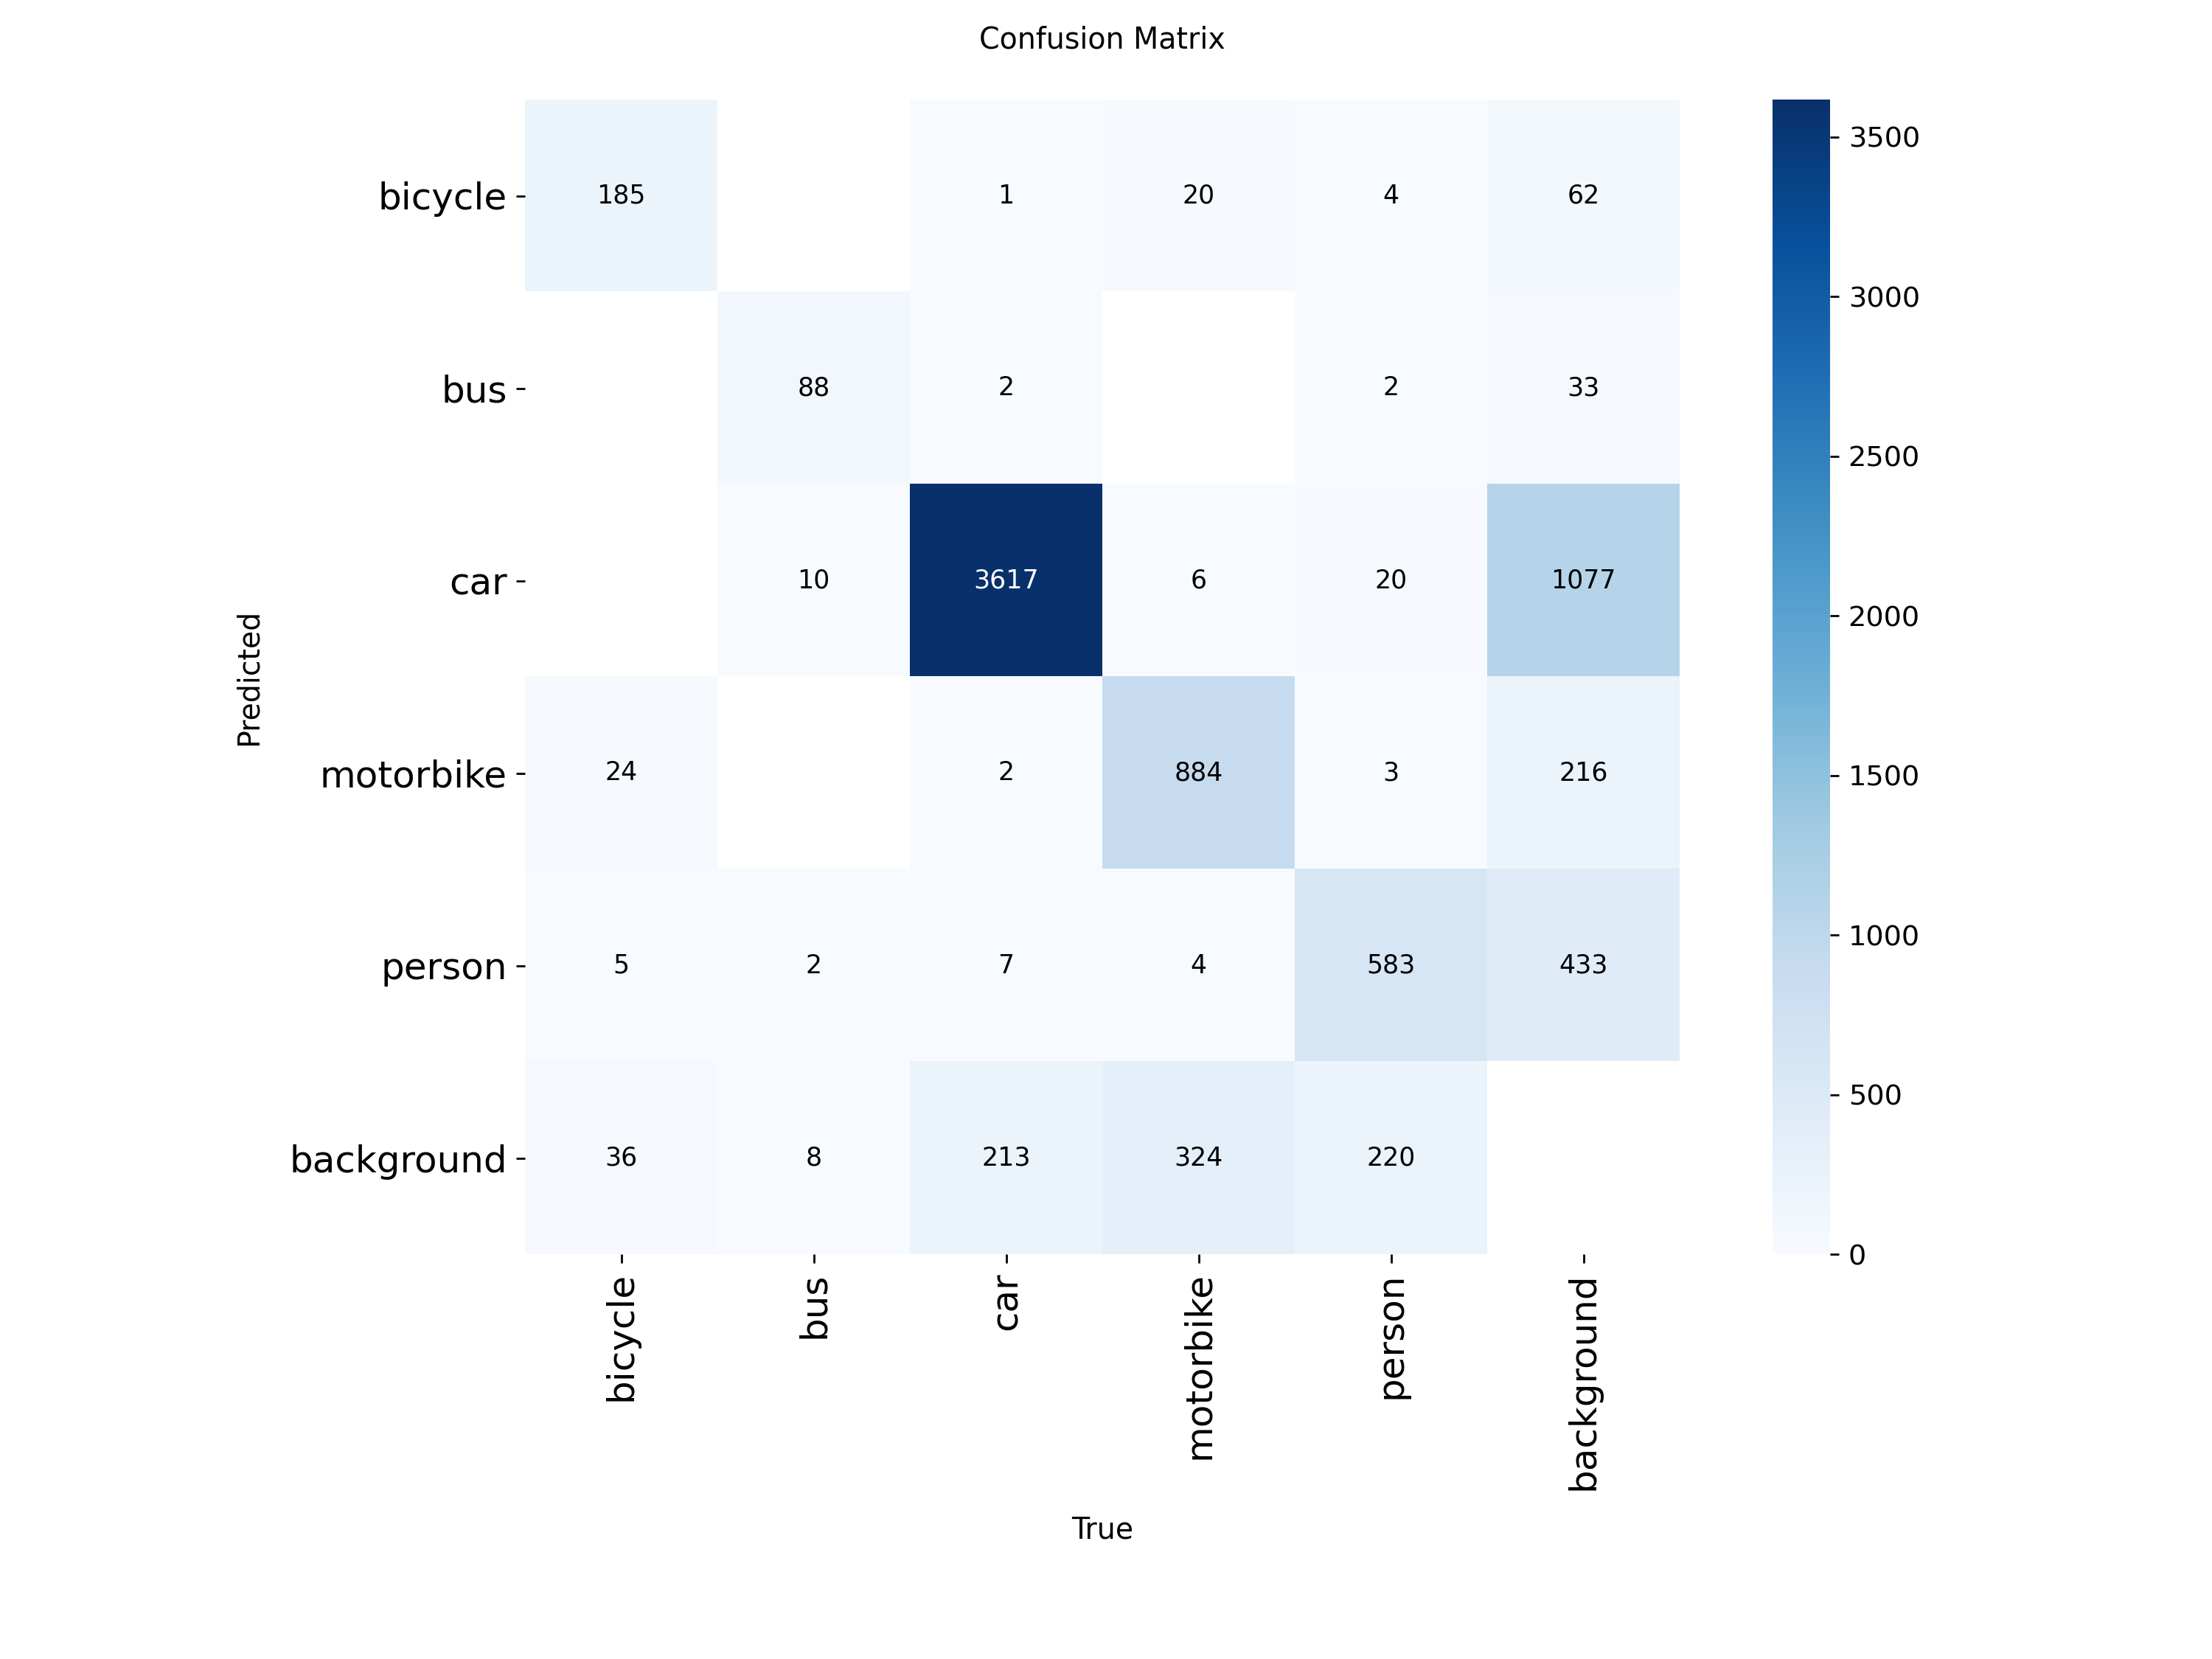

In [ ]:
Image(filename = "/home/eng_39_0072/Desktop/Gayanga/runs/detect/train2/confusion_matrix.png", width = 600)

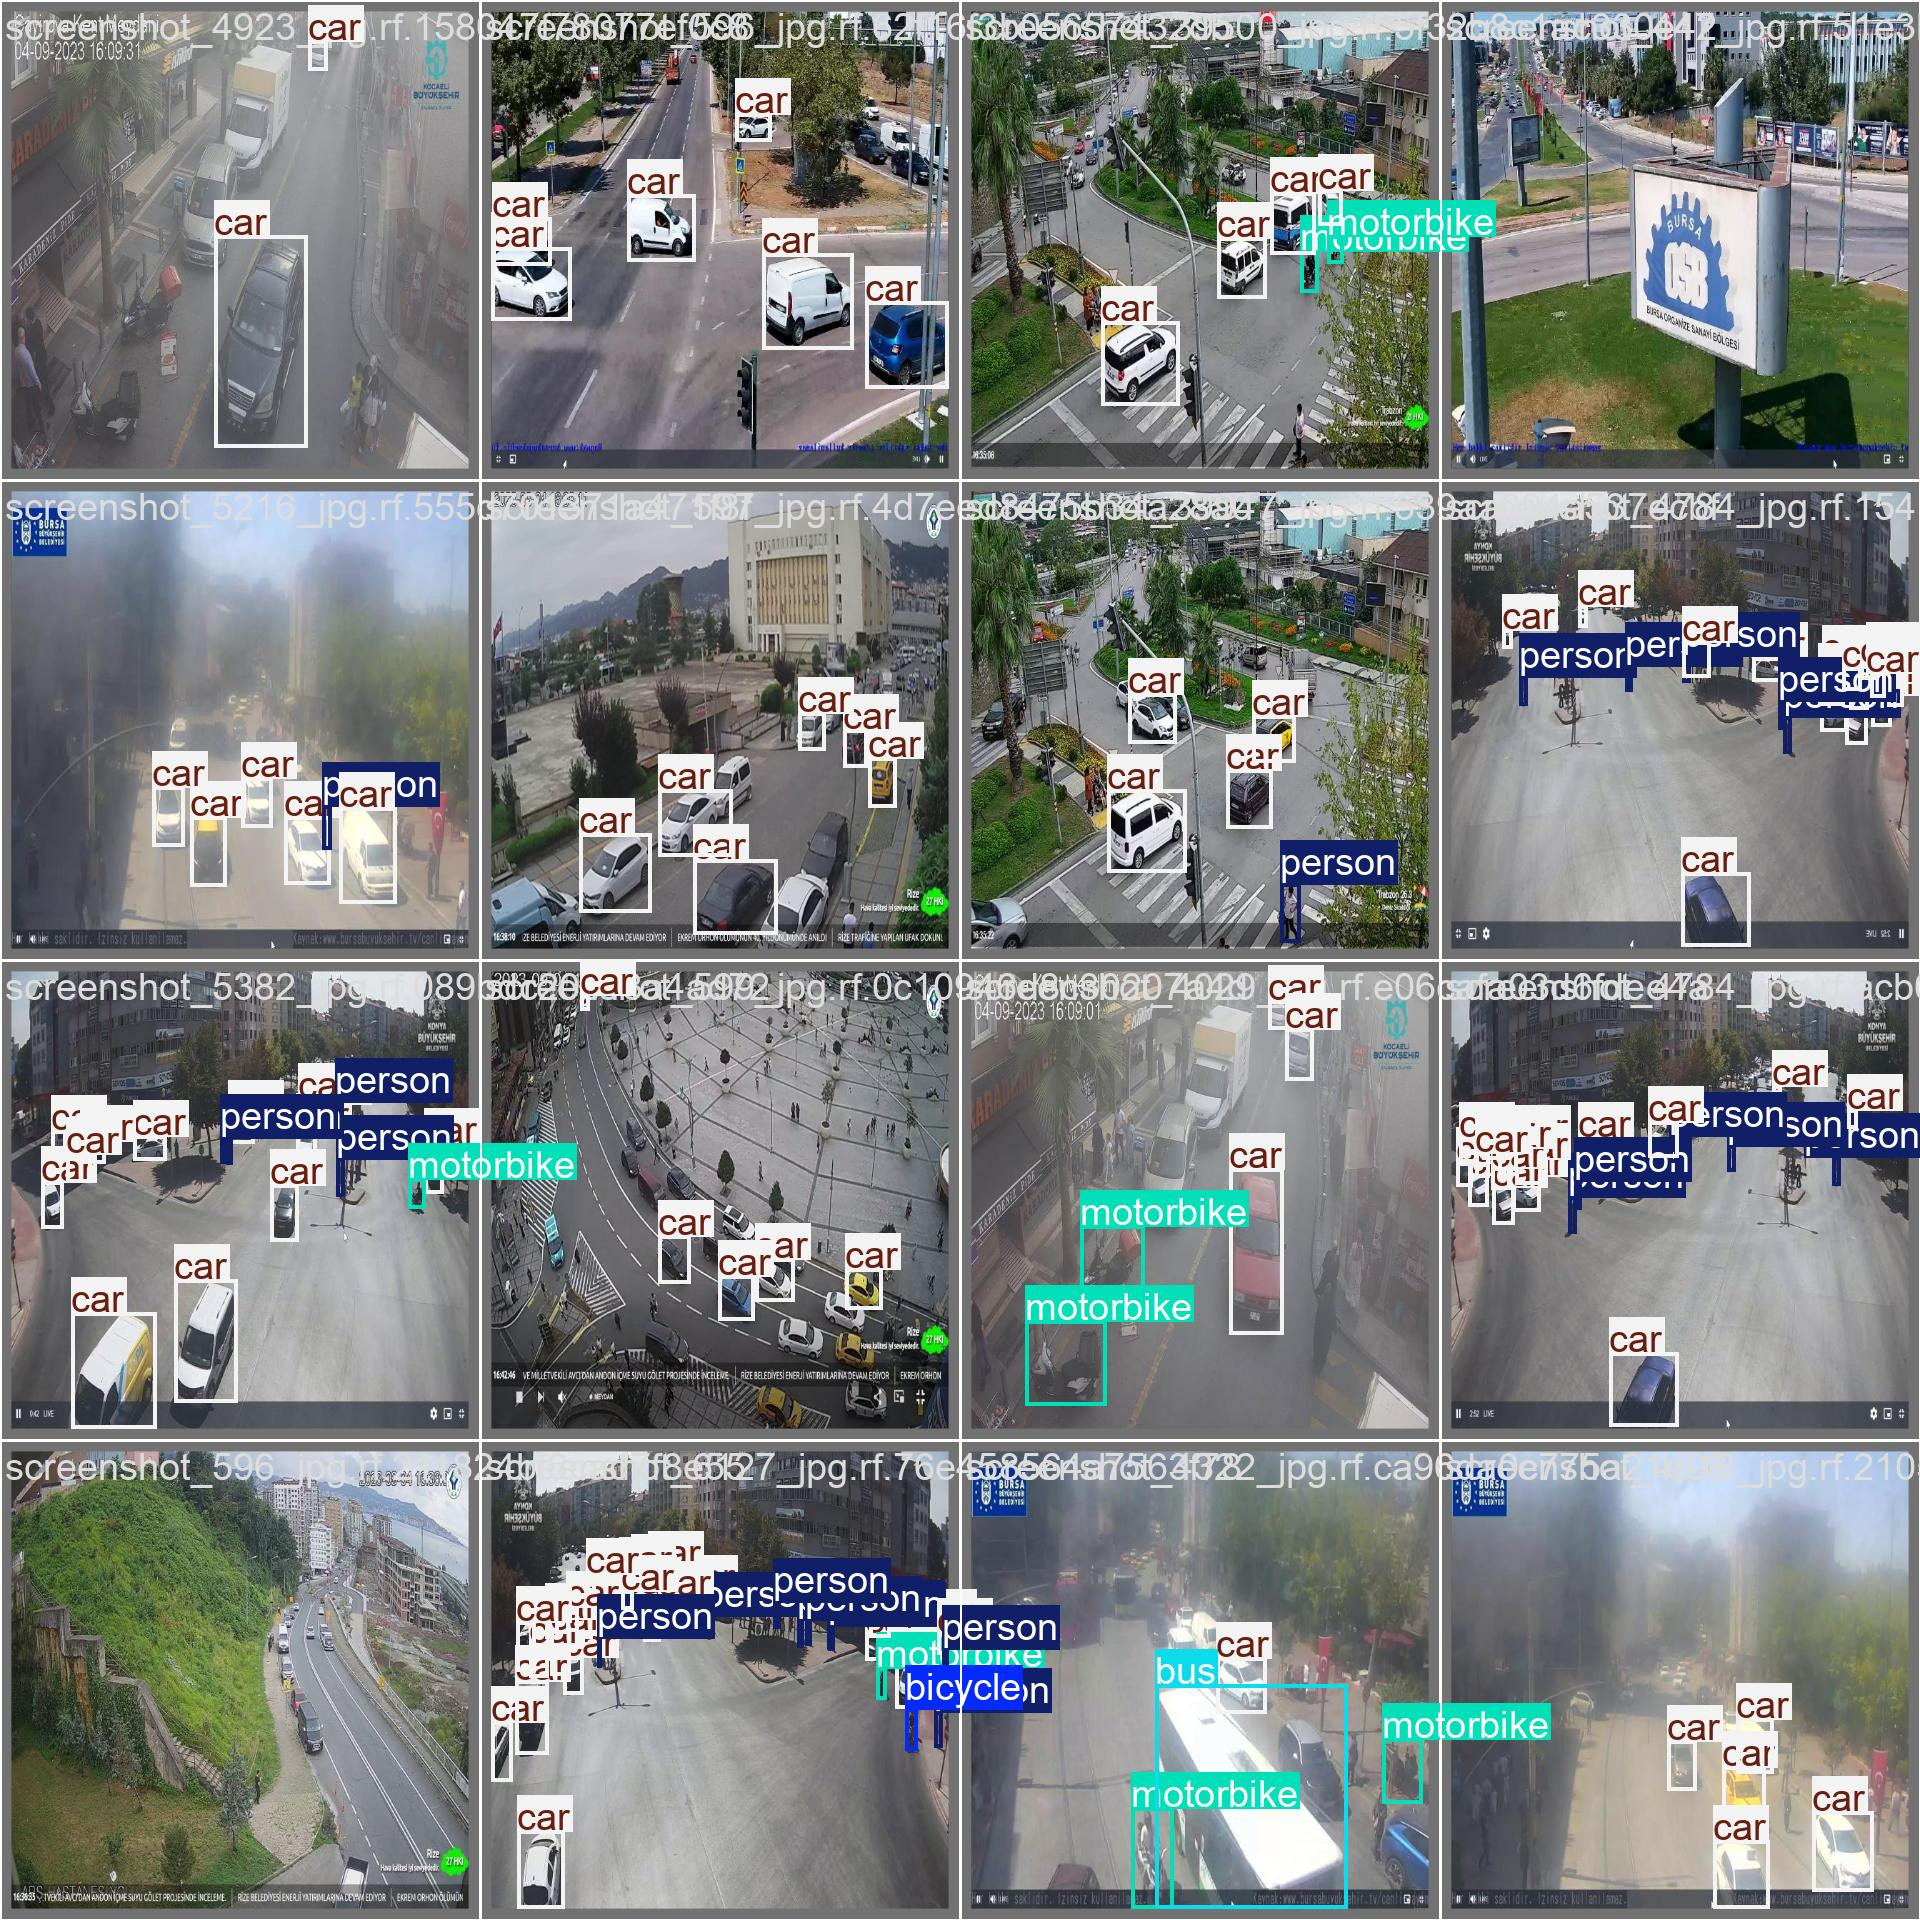

In [ ]:
Image(filename = "/home/eng_39_0072/Desktop/Gayanga/runs/detect/train2/val_batch1_labels.jpg", width = 600)

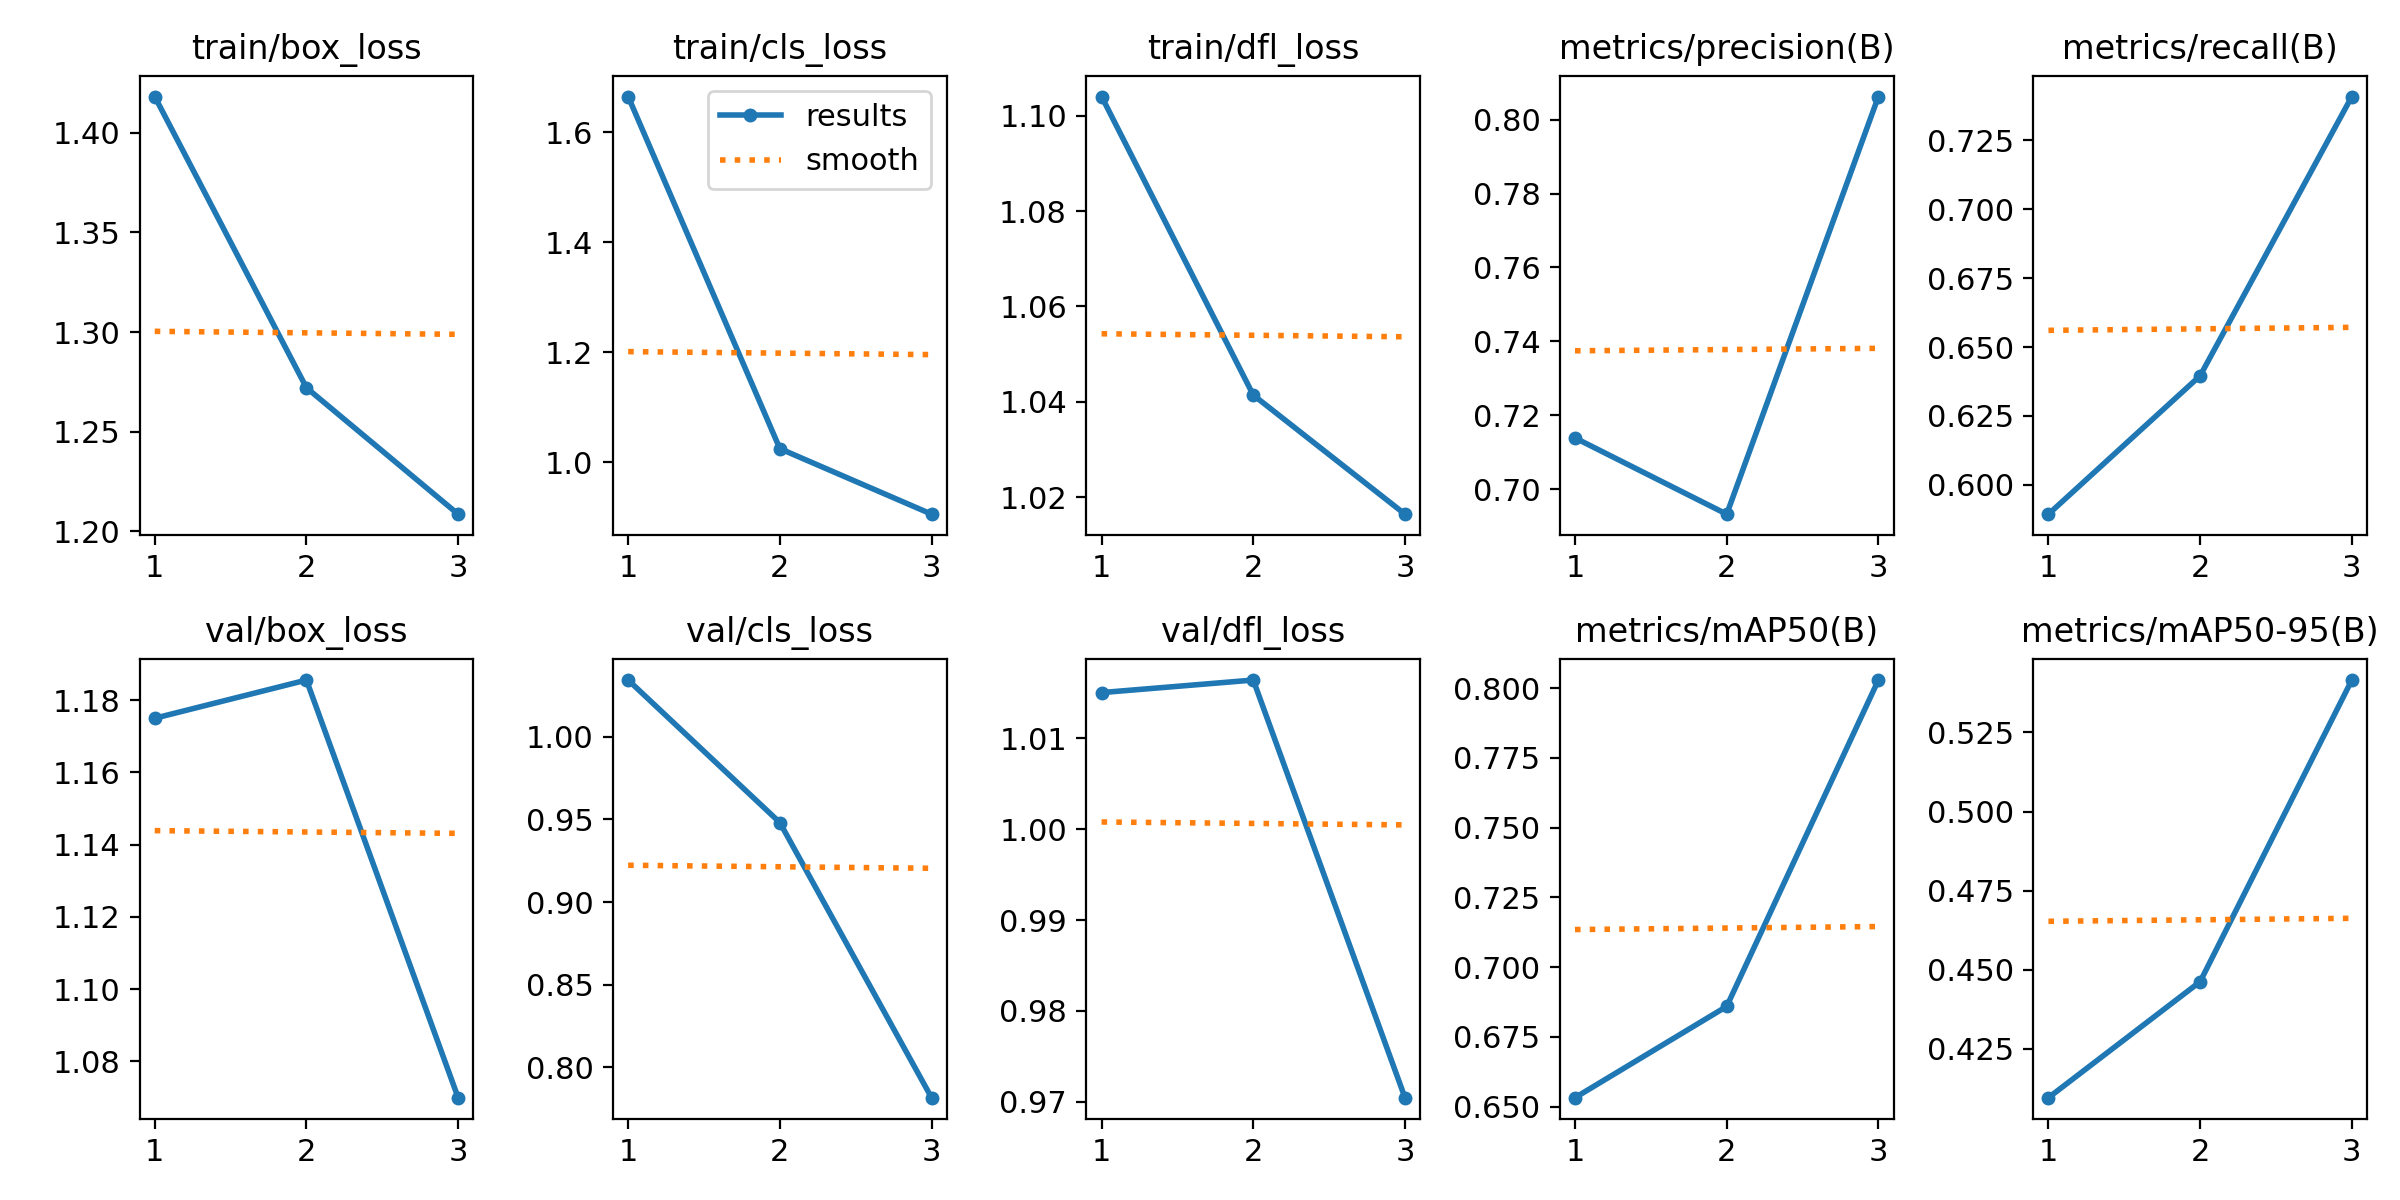

In [ ]:
Image(filename = "runs/detect/train/results.png", width = 600)

# **Model Validation as a separate step**

In [ ]:
val_results = model.val(model = "runs/detect/train3/weights/best.pt",  data="/home/eng_39_0072/Desktop/Gayanga/Traffic_detection/data.yaml")

Ultralytics 8.3.199 🚀 Python-3.13.5 torch-2.8.0+cu128 CPU (Intel Xeon Silver 4210 CPU @ 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1546.5±737.8 MB/s, size: 75.2 KB)
val: Scanning /home/eng_39_0072/Desktop/Gayanga/Traffic_detection/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 549/549 372.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 35/35 1.2it/s 29.9s0.8ss
                   all        549       6270      0.804      0.743      0.803      0.542
               bicycle        189        250      0.794      0.726      0.774      0.553
                   bus         81        108      0.825      0.833      0.871      0.712
                   car        520       3842      0.831      0.908      0.935      0.683
             motorbike        331       1238      0.874      0.658      0.778      0.447
                person        196        832      0.693      0.587      0

# **Results Visualization**

Showing same graphs as we previously validated while training

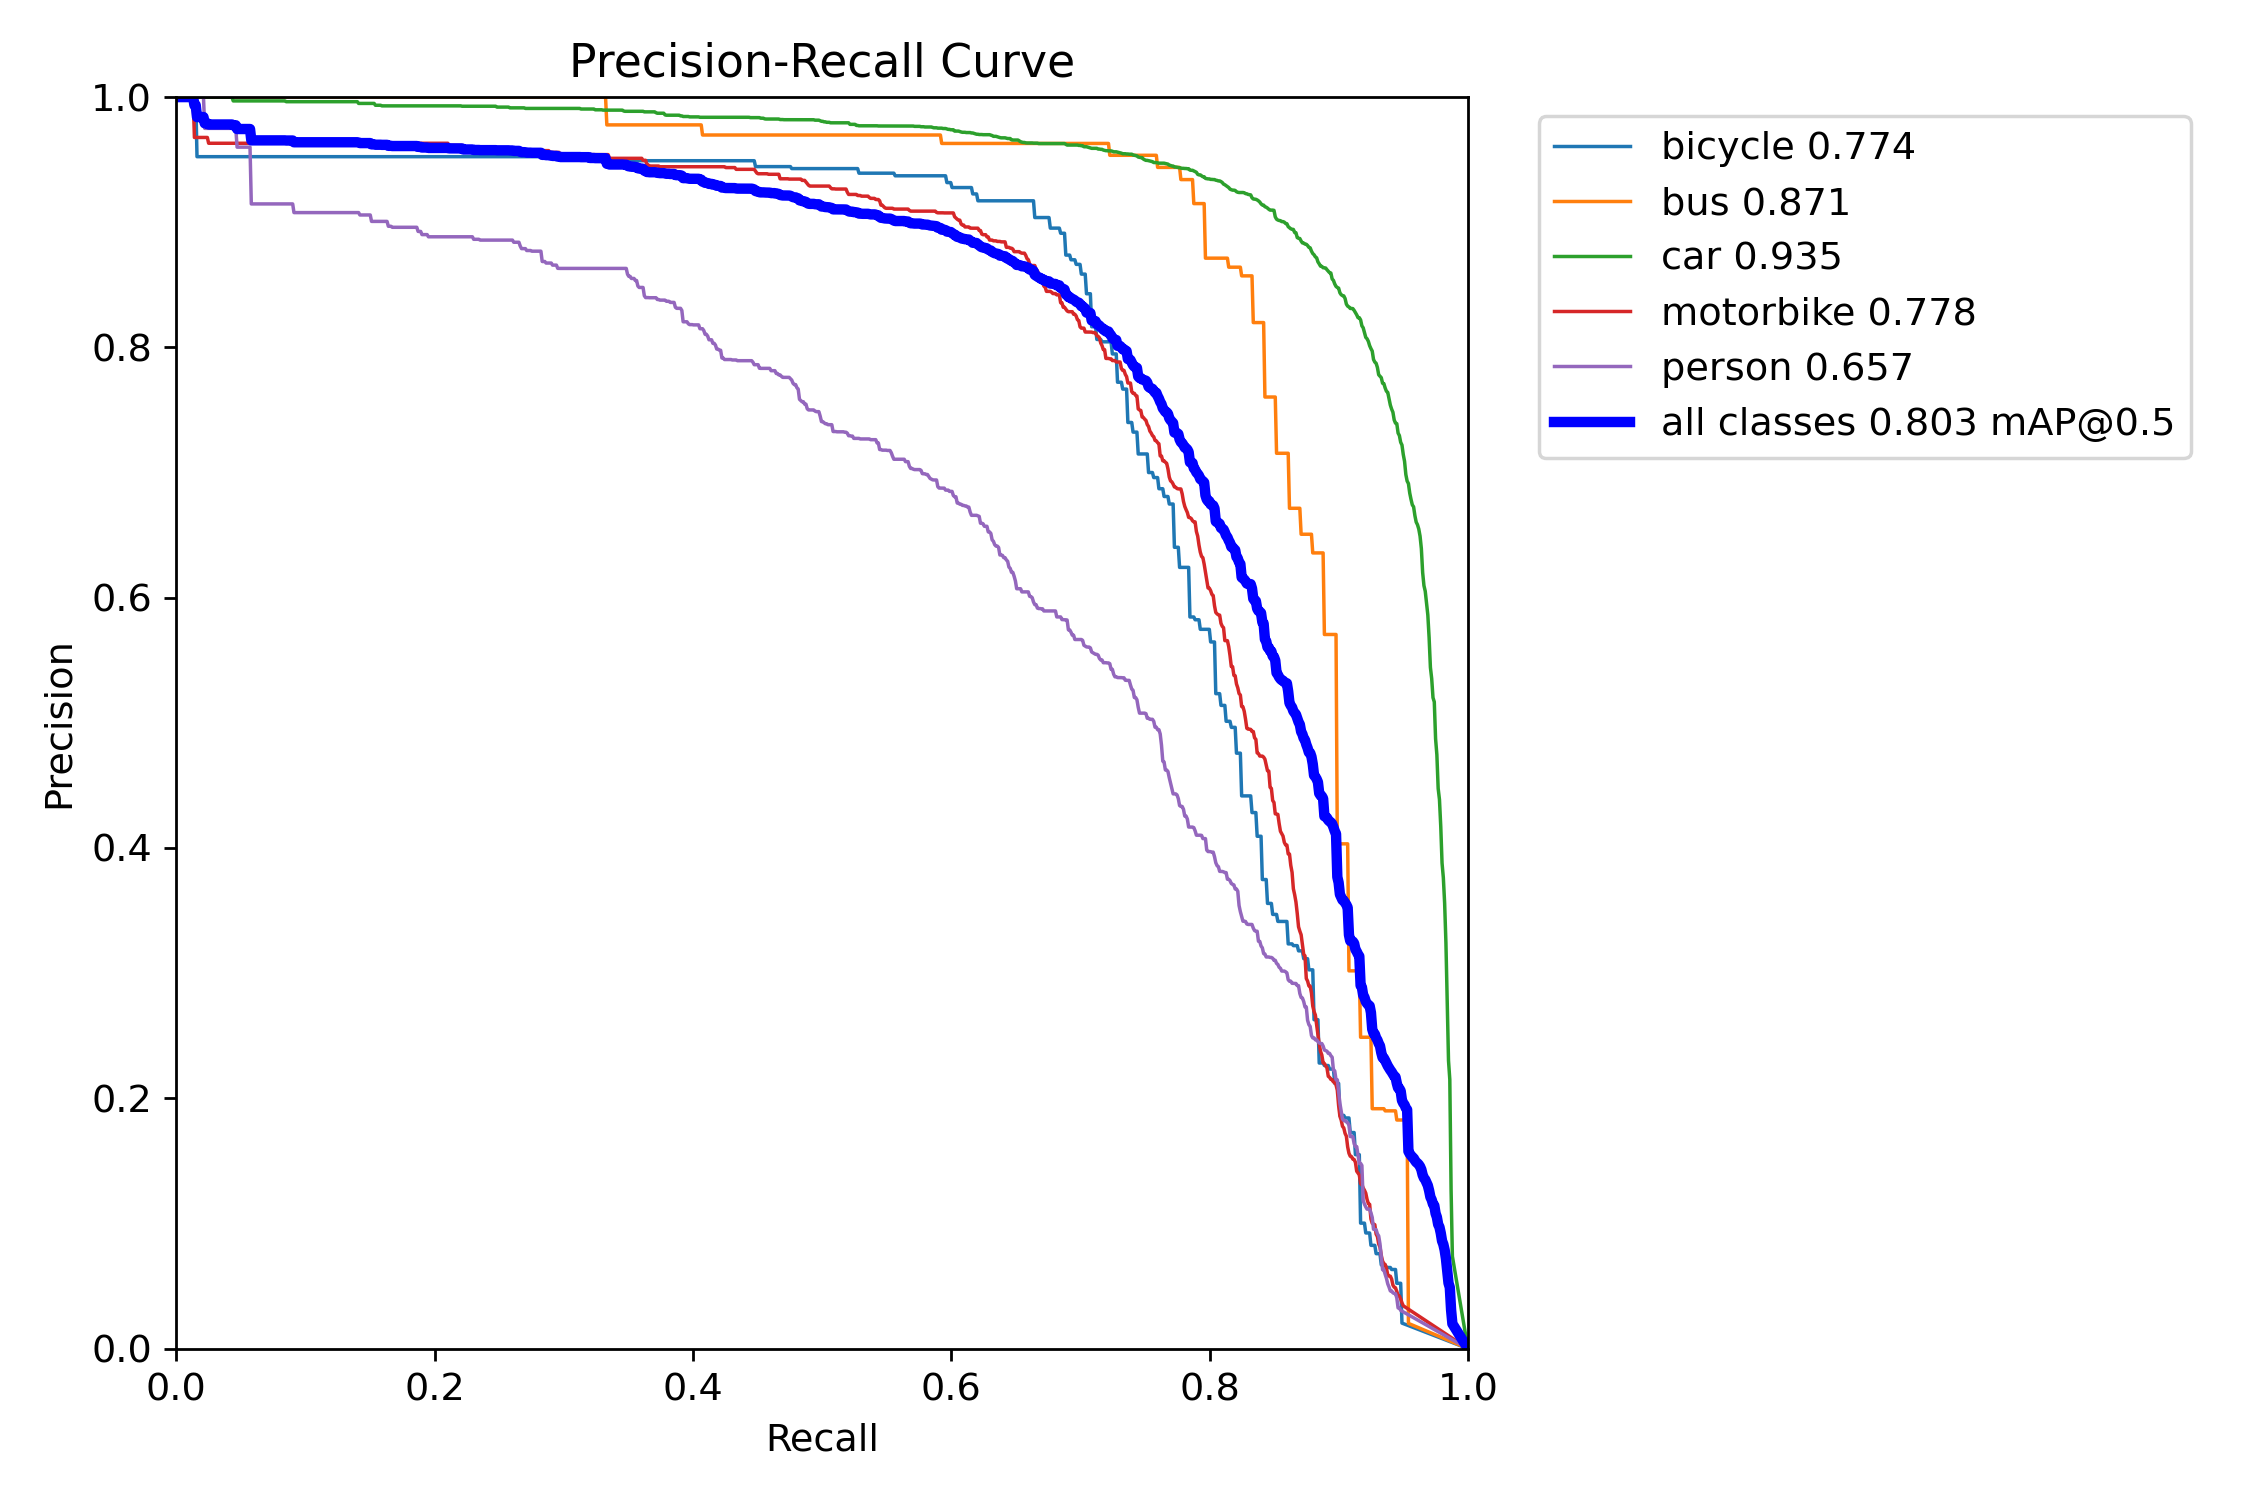

In [ ]:
Image(filename = "/home/eng_39_0072/Desktop/Gayanga/runs/detect/train3/BoxPR_curve.png", width = 600)

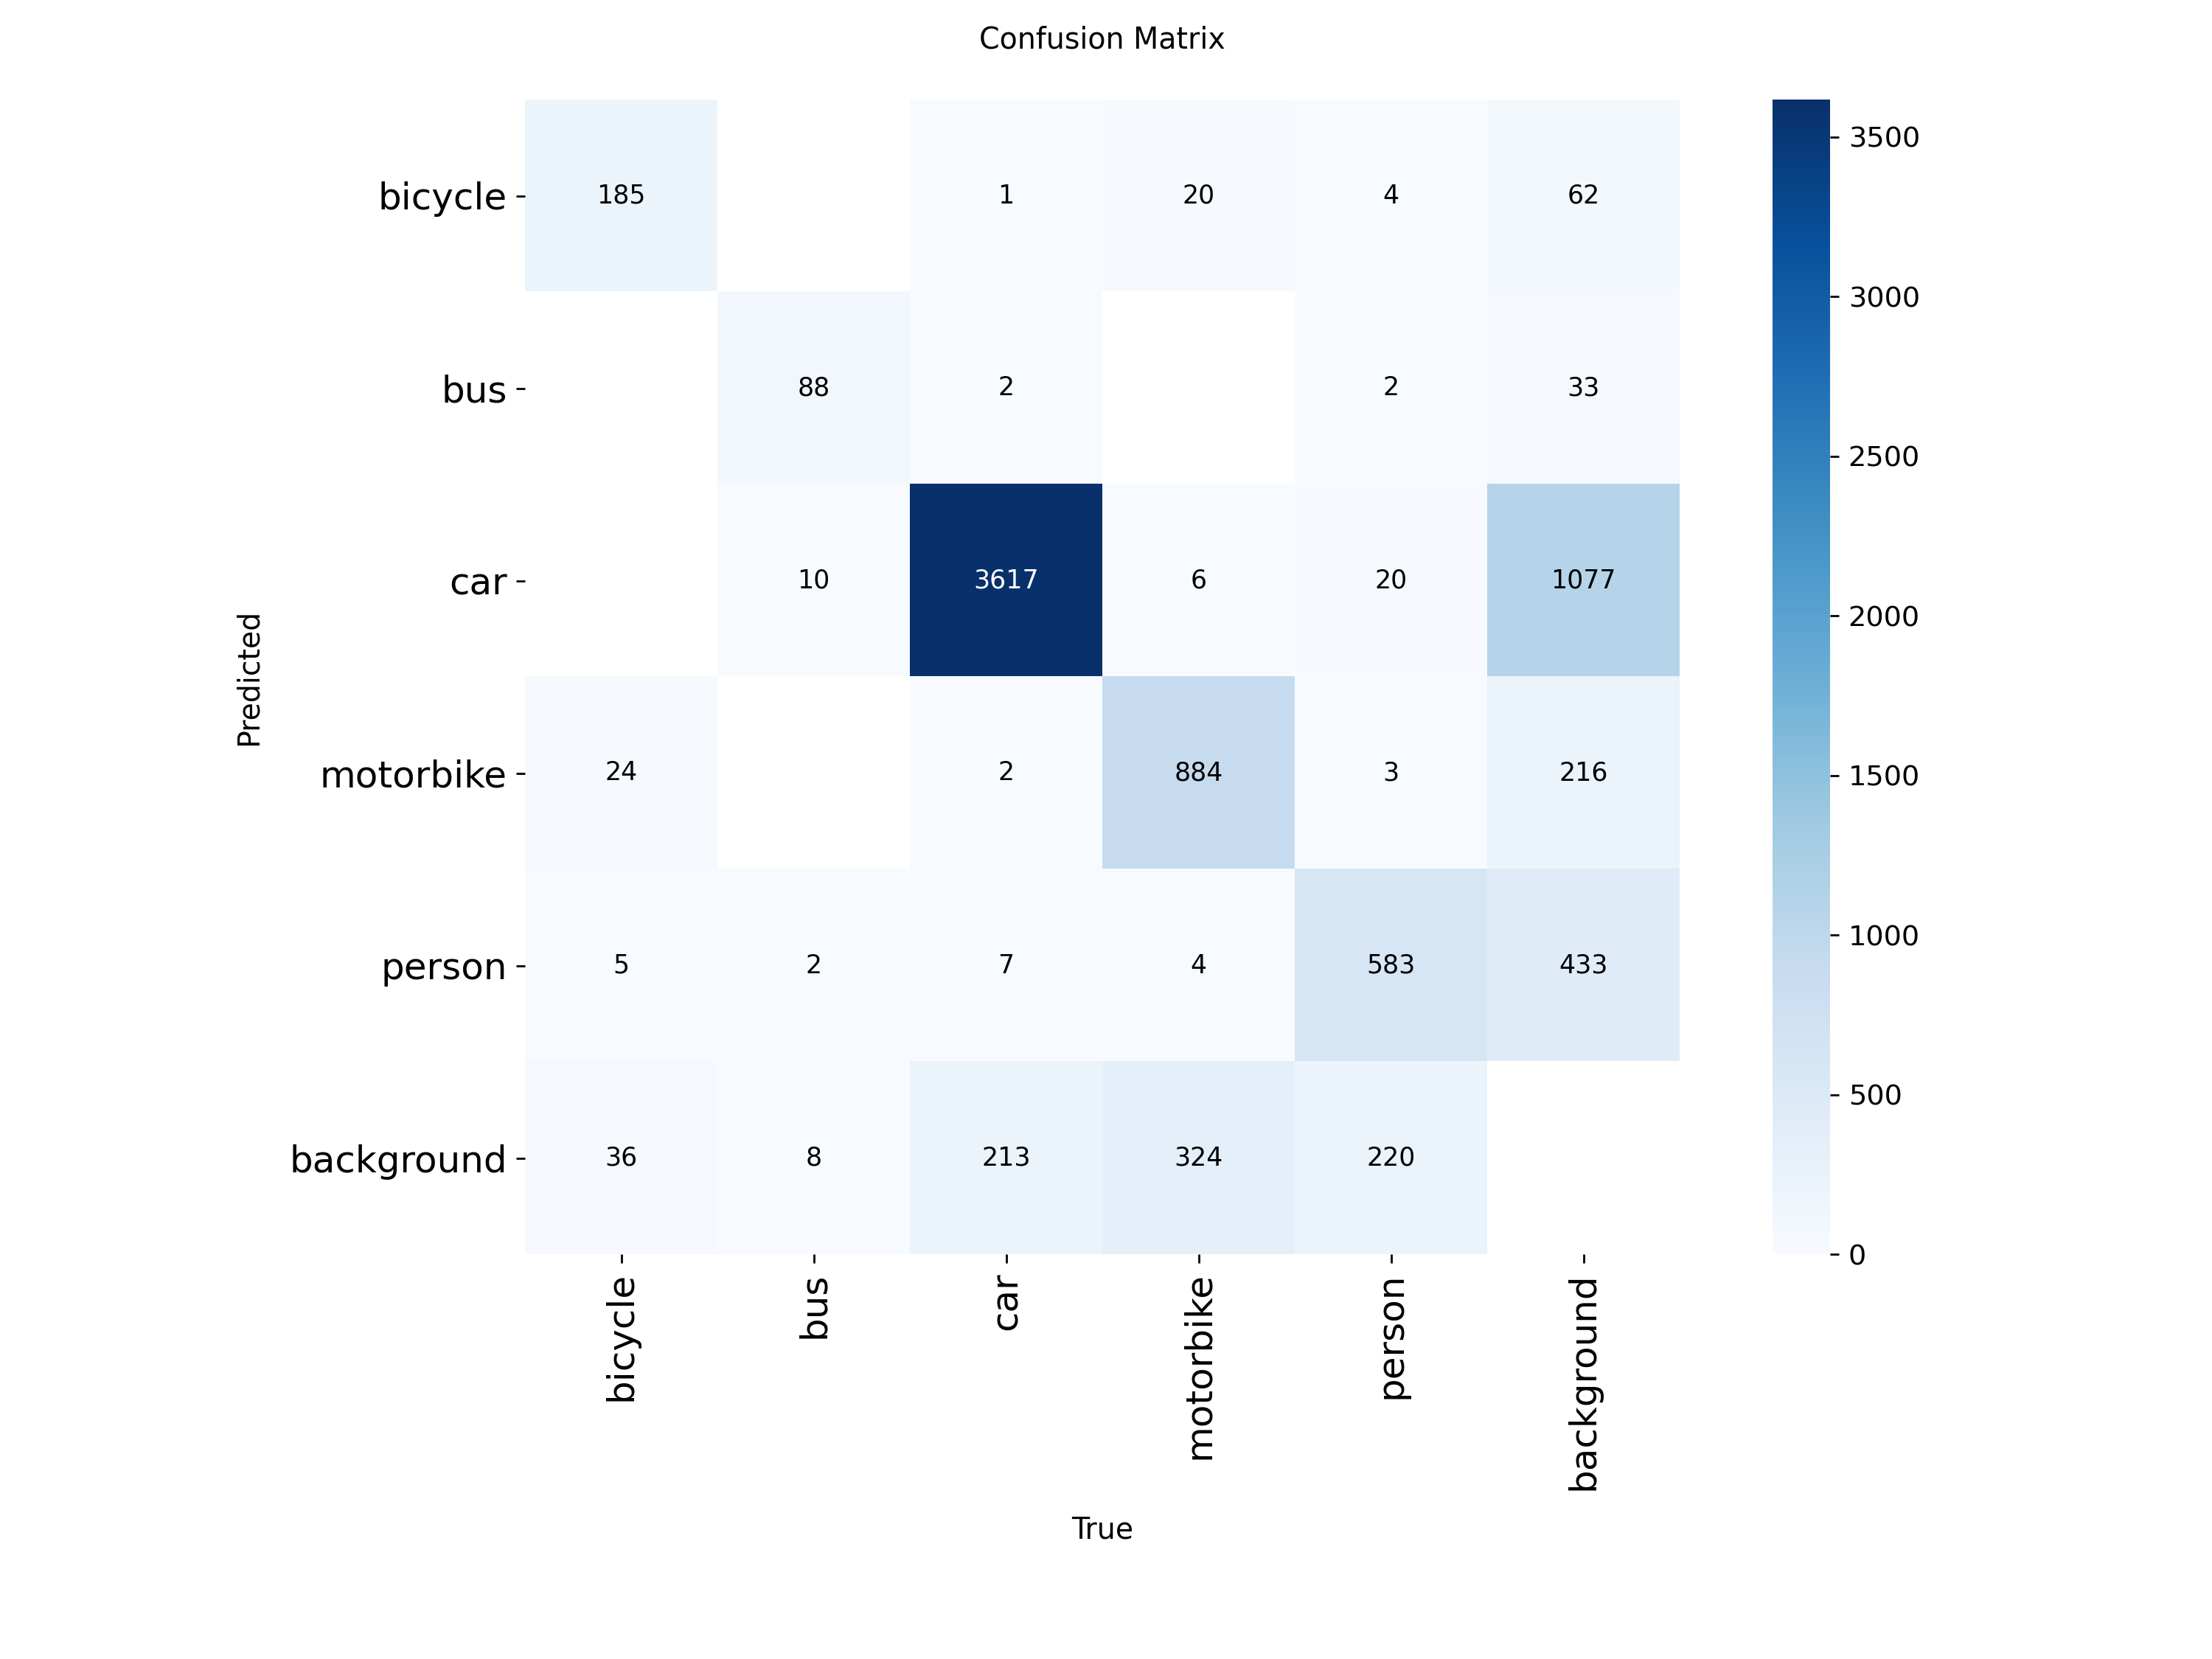

In [ ]:
Image(filename = "/home/eng_39_0072/Desktop/Gayanga/runs/detect/train3/confusion_matrix.png", width = 600)

# **Prediction**

Using Device:  cpu
YOLOv8m summary (fused): 92 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

0: 640x640 2 persons, 7 cars, 2 buss, 1 truck, 369.9ms
Speed: 2.7ms preprocess, 369.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


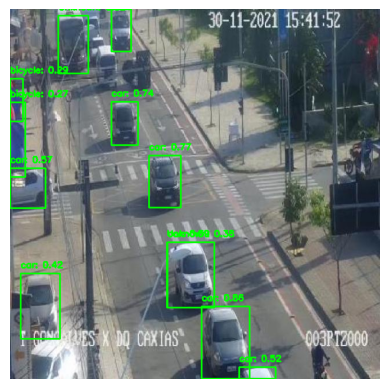


0: 640x640 3 persons, 12 cars, 1 train, 2 trucks, 474.3ms
Speed: 2.1ms preprocess, 474.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


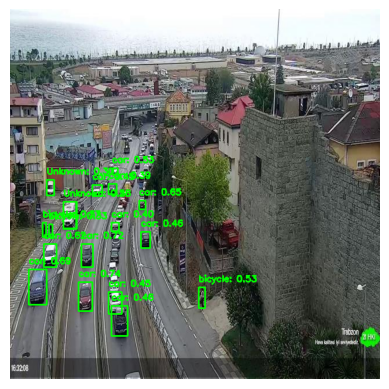


0: 640x640 3 cars, 2 trucks, 1 parking meter, 322.1ms
Speed: 2.0ms preprocess, 322.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


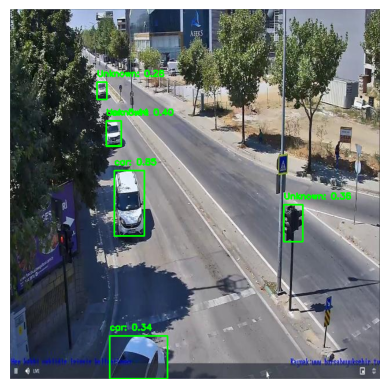


0: 640x640 1 car, 1 bus, 1 train, 372.3ms
Speed: 2.0ms preprocess, 372.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


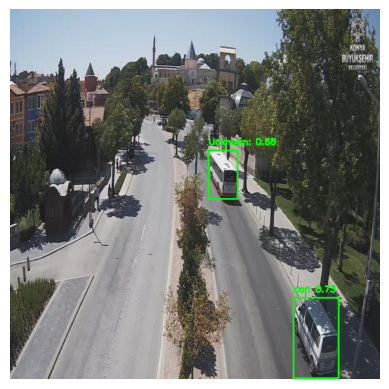


0: 640x640 4 persons, 1 bicycle, 1 car, 1 traffic light, 318.6ms
Speed: 2.2ms preprocess, 318.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


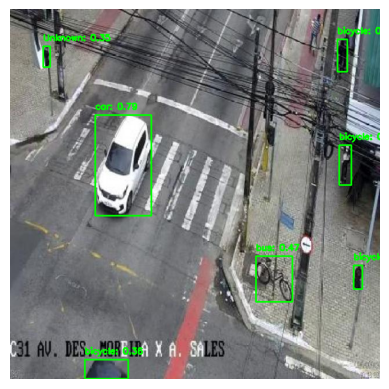


0: 640x640 2 bicycles, 2 cars, 329.8ms
Speed: 2.2ms preprocess, 329.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


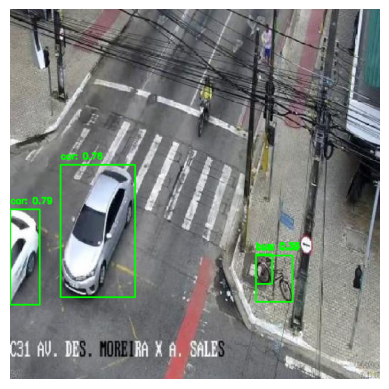

In [23]:
import torch
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
%matplotlib inline


class ObjectDetection:
    # Custom class names
    CUSTOM_CLASSES = ['bicycle', 'bus', 'car', 'motorbike', 'person']
    
    def __init__(self):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print("Using Device: ", self.device)
        self.model = self.load_model()
        
    def load_model(self):
        model = YOLO("yolov8m.pt")  # Load pretrained YOLOv8 model
        model.fuse()  # Optimize the model for inference
        return model
    
    def predict(self, image):
        results = self.model(image)
        return results
    
    def plot_bboxes(self, results, image):
        xyxys = []
        confidences = []
        class_ids = []

        # Extract detections for each result
        for result in results:
            boxes = result.boxes.cpu().numpy()
            for box in boxes:
                # Append specific attributes
                xyxy = box.xyxy[0]
                conf = box.conf[0]
                cls = int(box.cls[0])  # Convert to integer for indexing
                
                xyxys.append(xyxy)
                confidences.append(conf)
                class_ids.append(cls)
                
                # Draw bounding box
                cv2.rectangle(image, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (0, 255, 0), 2)
                if int(cls) < len(self.CUSTOM_CLASSES):  # Ensure class ID is within range
                    label = f"{self.CUSTOM_CLASSES[int(cls)]}: {conf:.2f}"  # Use custom class names
                else:
                    label = f"Unknown: {conf:.2f}"
                cv2.putText(image, label, (int(xyxy[0]), int(xyxy[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
    # Convert image back to RGB for matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image_rgb, xyxys, confidences, class_ids
    
    def display_results(self, image_rgb):
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

# Usage example
def main():
    detector = ObjectDetection()
    
    # Load an image (you can replace this with your image path)
    

    images = os.listdir("/home/eng_39_0072/Desktop/Gayanga/Traffic_detection/test/images/")
    for i , image_path in enumerate(images):
        image = Image.open("/home/eng_39_0072/Desktop/Gayanga/Traffic_detection/test/images/" + image_path)
        image = np.array(image)  # Convert PIL image to numpy array
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert to BGR format for OpenCV

        
        results = detector.predict(image)
        image_rgb, xyxys, confidences, class_ids = detector.plot_bboxes(results, image)
        detector.display_results(image_rgb)
        
        if i == 5:
            break

if __name__ == "__main__":
    main()
